목표 : 와인품질(화이트) 분류 모델
- 데이터: 7가지 품질(3~9)의 와인 데이터 winequality-white.csv
- 피  쳐: "fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol"
- 타  겟: "quality"
- 유  형: 지도학습/ 분류

(1) 모듈 로딩 & 데이터 준비

In [79]:
import pandas as pd                                    # 데이터 파일 관련 모듈
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier      # 기계학습 관련 모듈

In [80]:
data_file = '../data/winequality-white.csv'

In [81]:
# 피쳐/특성 11개
wineDF = pd.read_csv(data_file, sep=';')
wineDF

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [82]:
wineDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [83]:
wineDF['quality'].value_counts()        # 품질점수는 3~9만 존재

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

(2) 데이터 전처리
- 정제 : 결측치, 중복데이터, 이사이 처리
- 정규화 : 피쳐 스케일링

In [84]:
wineDF.corr()['quality']

fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
quality                 1.000000
Name: quality, dtype: float64

(3) 기계학습 데이터셋 준비 => 피쳐와 타겟 분리
<hr>

In [85]:
# 피쳐/특성/속성 데이터 추출
featureDF = wineDF[['citric acid','residual sugar']]
featureDF.head()

,citric acid,residual sugar
0,0.36,20.7
1,0.34,1.6
2,0.40,6.9
3,0.32,8.5
4,0.32,8.5


In [86]:
# 클래스/타겟/라벨 데이터 추출 ==> 수치화 즉 정소인코딩
targetDF = wineDF['quality']
targetDF.head()

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

targetDF는 3~9

(3-1) 학습/테스트 데이터셋 분리 <hr>
- 지도학습 중 분류 => 타겟의 비율 고려
- 학습: 테스트 = 80:20

In [87]:
# 모듈로딩
from sklearn.model_selection import train_test_split

In [88]:
x_train, x_test, y_train, y_test = train_test_split(featureDF, targetDF, test_size=0.2, stratify=targetDF)

In [89]:
# 학습 및 테스트 데이터셋 확인
print(x_train.shape, x_test.shape, y_train.shape)

(3918, 2) (980, 2) (3918,)


(3-2) 피쳐 데이터의 스케일링 <hr>
- 피쳐들의 값의 범위가 다른 것을 통일 시켜줌
- scikit-learn의 preprocessing 모듈 활용

In [90]:
# 모듈 로딩
from sklearn.preprocessing import StandardScaler

In [91]:
# 표준정규분포 스케일링 : 평균 0, 편차 1
# (1) 스케일러 인스턴스 생성
# (2) 데이터에 대한 평균, 표준편차 계산 진행 : fit() 메서드
# (3) 데이터에 대한 스케일링 진행 : transform() 메서드

In [92]:
scaler = StandardScaler()

In [93]:
scaler.fit(x_train)

StandardScaler()

In [94]:
scaler.mean_

array([0.33529607, 6.39312149])

In [95]:
scaler.transform(x_train)

array([[ 0.36937166,  1.6751805 ],
       [-0.29163806,  1.30103116],
       [-0.4568905 , -0.90448071],
       ...,
       [ 2.60027948,  0.37550386],
       [-0.62214293, -0.13648997],
       [-0.29163806,  1.26164702]])

In [96]:
# 학습용 데이터 피쳐 스케일링(train)
scaled_x_train = scaler.transform(x_train)
scaled_x_train.shape

(3918, 2)

In [97]:
# 테스트용 데이터 피쳐 스케일링 (test)
scaled_x_test = scaler.transform(x_test)
scaled_x_test.shape

(980, 2)

(3-3) 시각화

In [98]:
x_train.corr()

,citric acid,residual sugar
citric acid,1.000000,0.096106
residual sugar,0.096106,1.000000


In [99]:
scaled_x_train

array([[ 0.36937166,  1.6751805 ],
       [-0.29163806,  1.30103116],
       [-0.4568905 , -0.90448071],
       ...,
       [ 2.60027948,  0.37550386],
       [-0.62214293, -0.13648997],
       [-0.29163806,  1.26164702]])

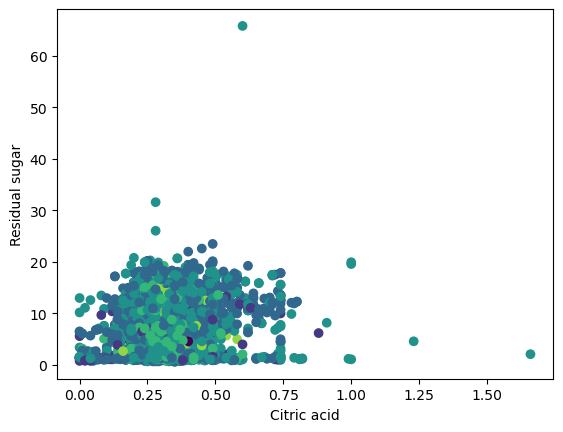

In [100]:
## => 원본 데이터 시각화 (alcohol, density)
plt.scatter(x_train['citric acid'], x_train['residual sugar'], c=y_train)
plt.xlabel('Citric acid')
plt.ylabel('Residual sugar')
plt.show()

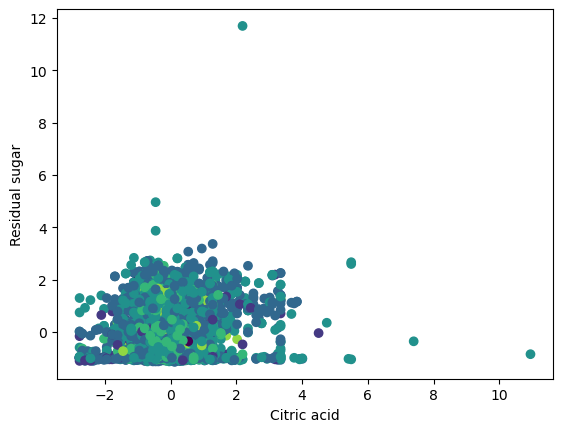

In [101]:
## => 스케일된 데이터 시각화
plt.scatter(scaled_x_train[:, 0], scaled_x_train[:, 1], c=y_train)
plt.xlabel('Citric acid')
plt.ylabel('Residual sugar')
plt.show()

(4) 학습진행

In [102]:
## KNN 알고리즘
## 모델 성능 좌우하는 매개변수 => 하이퍼파라미터 : n_neighbors
## n_neighbors 즉 k 갯수 : 1~ 전체 데이터 수
max_k = scaled_x_train.shape[0]
max_k

3918

In [103]:
test_scoreList = []
train_scoreList = []
for k in range(1, 101):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(scaled_x_train, y_train)
    
    train_scoreList.append(model.score(scaled_x_train, y_train))
    test_scoreList.append(model.score(scaled_x_test, y_test))

In [104]:
sorted(test_scoreList)

[0.44387755102040816,
 0.4448979591836735,
 0.4448979591836735,
 0.4459183673469388,
 0.4489795918367347,
 0.45102040816326533,
 0.4520408163265306,
 0.4520408163265306,
 0.4520408163265306,
 0.4530612244897959,
 0.45714285714285713,
 0.45816326530612245,
 0.45816326530612245,
 0.45918367346938777,
 0.46122448979591835,
 0.46224489795918366,
 0.46224489795918366,
 0.463265306122449,
 0.463265306122449,
 0.463265306122449,
 0.4642857142857143,
 0.4642857142857143,
 0.4642857142857143,
 0.4642857142857143,
 0.4642857142857143,
 0.4642857142857143,
 0.4642857142857143,
 0.4642857142857143,
 0.4642857142857143,
 0.4642857142857143,
 0.46530612244897956,
 0.46530612244897956,
 0.46530612244897956,
 0.46530612244897956,
 0.46530612244897956,
 0.4663265306122449,
 0.4663265306122449,
 0.4663265306122449,
 0.4663265306122449,
 0.4663265306122449,
 0.4663265306122449,
 0.4663265306122449,
 0.4663265306122449,
 0.4663265306122449,
 0.4673469387755102,
 0.4673469387755102,
 0.4673469387755102,
 0

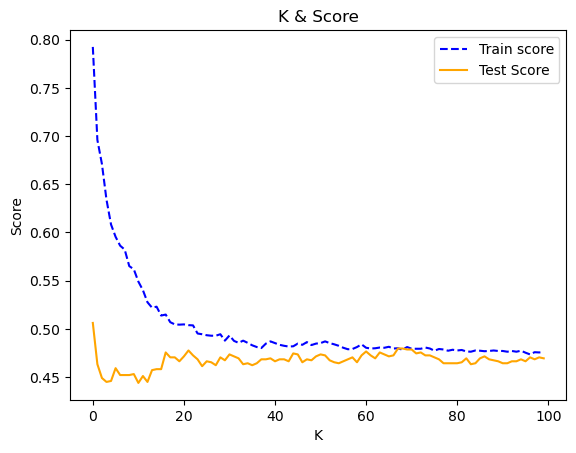

In [105]:
# K 갯수에 따른 학습용/테스트용 점수 시각화
plt.plot(train_scoreList, 'b--', label='Train score')
plt.plot(test_scoreList, color='orange', label='Test Score')
plt.title('K & Score')
plt.xlabel('K')
plt.ylabel('Score')
plt.legend()
plt.show()

(4) 테스트 진행

In [106]:
test_scoreList.index(max(test_scoreList))           # k=1 일때 최대

0

In [107]:
windModel = KNeighborsClassifier(n_neighbors=1)
windModel

KNeighborsClassifier(n_neighbors=1)

In [108]:
# 학습
windModel.fit(scaled_x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

(5) 테스트 진행

In [109]:
windModel.score(scaled_x_test, y_test)

0.5061224489795918

In [110]:
print(f'KNN: {windModel.score(scaled_x_test,y_test)}')

KNN: 0.5061224489795918


(6) 예측 <hr>